In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, accuracy_score, classification_report, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

random_state = 42
random.seed(random_state)
np.random.seed(random_state)



In [ ]:
# --- 1. Load your data ---

with open('/content/drive/MyDrive/data/all_features_combined.pickle', 'rb') as f:
    all_features_combined_df = pickle.load(f)

with open('/content/drive/MyDrive/data/label_df_3.pickle', 'rb') as f:
    label_df_3 = pickle.load(f)
print(label_df_3['majority_label_3'].value_counts())
all_features_combined_df

majority_label_3
Active engagement          50
Intermittent engagement    32
Disengagement              20
Name: count, dtype: int64


,segment_id,AU_feature,dnn_feature,manual_feature,AU_feature_ref1,dnn_feature_ref1,manual_feature_ref1,AU_feature_ref2,dnn_feature_ref2,manual_feature_ref2
0,20210323-SP07F_clip_378_383,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[0.034613874, -0.22478016, 0.07269942, -0.3664...","[126.0, 12.609585210300457, 28.444309351049924...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.052595716, 0.06267054, -0.123, -0.41390204,...","[126.0, -23.982031966138386, 25.88700200677383...","[0.1348412698412698, 0.2224328541451883, 6.0, ...","[-0.299179, -0.36308083, -0.21096529, 0.192069...","[126.0, -3.078479217421869, 24.666117899730004..."
1,20210323-SP07F_clip_1113_1118,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[0.061545894, -0.25375453, -0.04545928, -0.193...","[125.0, 8.967601040954058, 26.538118969393903,...","[0.053015873015873, 0.0807590969862327, 0.0, -...","[0.07015944, 0.020164885, -0.05986896, -0.2490...","[126.0, -42.03995220760016, 27.480209132219365...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.027060911, -0.08274244, 0.0400747, 0.069514...","[126.0, -1.0203919666780152, 26.30721485617076..."
2,20210323-SP07F_clip_1074_1079,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[-0.009148686, -0.12560014, -0.08919125, -0.21...","[121.0, 16.190503685472198, 26.270694432031604...","[0.1348412698412698, 0.2224328541451883, 6.0, ...","[-0.299179, -0.36308083, -0.21096529, 0.192069...","[126.0, 22.120582578287895, 22.3158813791212, ...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.037613317, -0.005479859, 0.007825111, -0.00...","[126.0, -3.270940913024445, 27.572546816724127..."
3,20210323-SP07F_clip_1182_1187,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[-0.041140895, -0.088186085, 0.0039451574, -0....","[89.0, 4.982063863359799, 30.799108675192933, ...","[0.1348412698412698, 0.2224328541451883, 6.0, ...","[-0.299179, -0.36308083, -0.21096529, 0.192069...","[126.0, 17.31989267131847, 23.09387887171484, ...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.15345049, 0.123038046, -0.33340588, -0.4496...","[126.0, 6.043316631352067, 23.236435152206642,..."
4,20210323-SP07F_clip_255_260,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[-0.017098123, -0.22169487, 0.061171174, -0.33...","[122.0, 12.994270436686323, 28.811799580626968...","[0.088015873015873, 0.1128752928945557, 0.0, -...","[-0.018141264, -0.13290454, 0.06462509, 0.2290...","[126.0, 46.44568364985898, 36.5801491866292, 1...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.102719806, 0.10402108, -0.085270084, -0.421...","[126.0, -18.488218431374484, 27.66351393040864..."
...,...,...,...,...,...,...,...,...,...,...
626,20220916-SP07F_clip_170_175,"[0.2068253968253968, 0.4341200770176864, 4.0, ...","[-0.08298848, -0.21334194, -0.23492509, -0.169...","[99.0, 3.015383967411516, 32.090275432264924, ...","[0.0781746031746031, 0.105666651644884, 0.0, -...","[-0.14228053, -0.19247176, -0.21233575, -0.017...","[126.0, -1.5842548036780788, 25.78576166560231...","[0.0775396825396825, 0.1268806463283444, 1.0, ...","[0.09140542, 0.11850408, -0.22142988, -0.53438...","[126.0, 1.1535208357646158, 24.580112330111366..."
627,20220916-SP07F_clip_0_5,"[0.2068253968253968, 0.4341200770176864, 4.0, ...","[-0.0563802, -0.22218841, -0.24426143, -0.1588...","[119.0, 12.12459926234018, 30.185529291105983,...","[0.0775396825396825, 0.1268806463283444, 1.0, ...","[-0.15170558, -0.19269006, -0.2064976, -0.1806...","[121.0, 0.7987719690956768, 28.6503157046054, ...","[0.0775396825396825, 0.1268806463283444, 1.0, ...","[0.054450084, -0.08387012, -0.12646388, -0.310...","[121.0, -7.012214102436831, 23.61696465074466,..."
628,20220916-SP07F_clip_235_240,"[0.2068253968253968, 0.4341200770176864, 4.0, ...","[-0.10170282, -0.21903856, -0.11246258, -0.036...","[125.0, 17.00454538866136, 31.420981086640406,...","[0.0775396825396825, 0.1268806463283444, 1.0, ...","[-0.044145454, -0.11295659, -0.00957068, -0.20...","[126.0, -1.2291

Original DNN features shape: (1647, 512)
PCA transformed DNN features shape: (1647, 100)


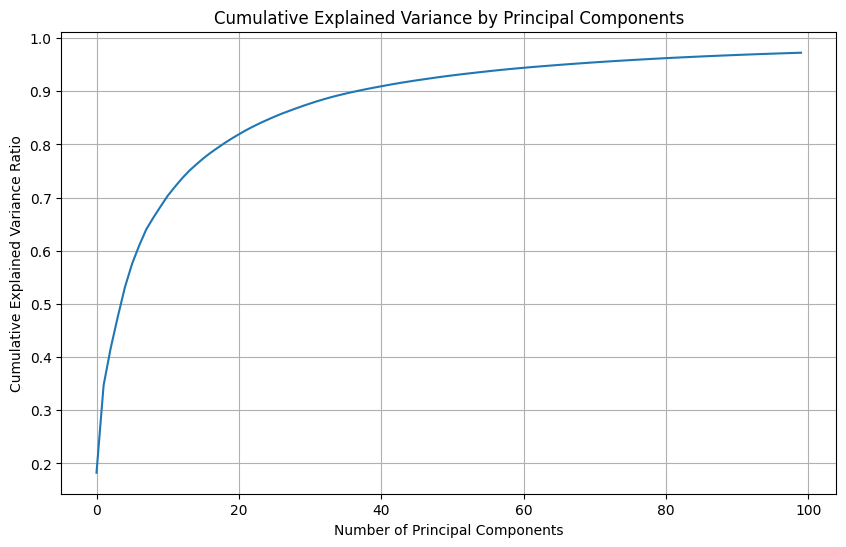

In [ ]:
# prompt: apply pca for all_features_combined_df dnn_features

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'dnn_features' is a column in all_features_combined_df that contains the DNN features
# If it's a separate variable or needs different handling, adjust accordingly.

# Extract the DNN features
dnn_features = all_features_combined_df['dnn_feature'].tolist() +all_features_combined_df['dnn_feature_ref1'].tolist() +all_features_combined_df['dnn_feature_ref2'].tolist() # Convert to list of arrays
dnn_features = np.array(dnn_features) # Convert list of arrays to a single numpy array

# Standardize the data before applying PCA
scaler = StandardScaler()
dnn_features_scaled = scaler.fit_transform(dnn_features)

# Apply PCA
# You can choose the number of components, here we'll keep all for now, or specify a number (e.g., n_components=100)
pca = PCA(100)
dnn_features_pca = pca.fit_transform(dnn_features)

# You can now use dnn_features_pca for further analysis or store it
print("Original DNN features shape:", dnn_features.shape)
print("PCA transformed DNN features shape:", dnn_features_pca.shape)

# Optional: Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# print("Explained variance ratio:", explained_variance_ratio)

# Optional: Plot explained variance to help decide on the number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

all_features_combined_df['dnn_feature_pca'] = dnn_features_pca.tolist()[:len(all_features_combined_df)]
all_features_combined_df['dnn_feature_pca_ref1'] = dnn_features_pca.tolist()[len(all_features_combined_df):len(all_features_combined_df)*2]
all_features_combined_df['dnn_feature_pca_ref2'] = dnn_features_pca.tolist()[len(all_features_combined_df)*2:]

Original AU features shape: (1647, 85)
PCA transformed AU features shape: (1647, 20)


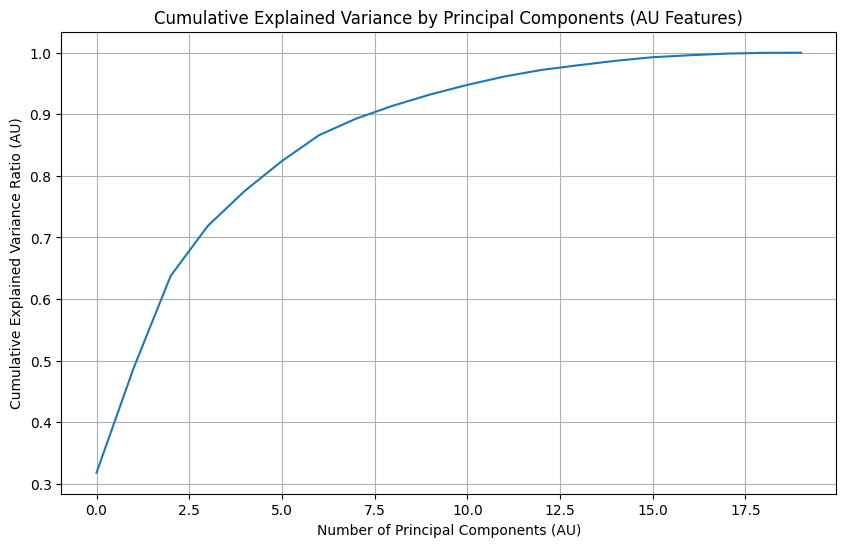

AU PCA features added to DataFrame.


In [ ]:
# prompt: apply pca for au features

import matplotlib.pyplot as plt
import numpy as np
# --- Apply PCA for AU features ---

# Extract the AU features
# Assuming 'au_features' and similar columns exist in all_features_combined_df
# You might need to adjust the column names based on your dataframe structure
au_features_cols = ['AU_feature', 'AU_feature_ref1', 'AU_feature_ref2'] # Adjust column names as needed
au_features_list = []
for col in au_features_cols:
    if col in all_features_combined_df.columns:
        # Assuming AU features are stored as lists or arrays in the DataFrame cells
        au_features_list.extend(all_features_combined_df[col].tolist())
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

if not au_features_list:
    print("Error: No AU feature columns found or they are empty.")
else:
    au_features = np.array(au_features_list)

    # Standardize the data before applying PCA
    scaler_au = StandardScaler()
    au_features_scaled = scaler_au.fit_transform(au_features)

    # Apply PCA for AU features
    # You can choose the number of components, e.g., 20 for AU features
    pca_au = PCA(n_components=20) # Adjust n_components as needed
    au_features_pca = pca_au.fit_transform(au_features_scaled)

    # Print shapes
    print("Original AU features shape:", au_features.shape)
    print("PCA transformed AU features shape:", au_features_pca.shape)

    # Optional: Analyze the explained variance ratio for AU features
    explained_variance_ratio_au = pca_au.explained_variance_ratio_
    # print("Explained variance ratio for AU features:", explained_variance_ratio_au)

    # Optional: Plot explained variance for AU features
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(explained_variance_ratio_au))
    plt.xlabel('Number of Principal Components (AU)')
    plt.ylabel('Cumulative Explained Variance Ratio (AU)')
    plt.title('Cumulative Explained Variance by Principal Components (AU Features)')
    plt.grid(True)
    plt.show()

    # Add PCA transformed AU features back to the DataFrame
    # Need to split the combined PCA results back to original reference groups
    num_samples_per_ref = len(all_features_combined_df)
    all_features_combined_df['au_features_pca'] = au_features_pca[:num_samples_per_ref].tolist()
    if len(au_features_cols) > 1:
        all_features_combined_df['au_features_pca_ref1'] = au_features_pca[num_samples_per_ref:num_samples_per_ref*2].tolist()
    if len(au_features_cols) > 2:
        all_features_combined_df['au_features_pca_ref2'] = au_features_pca[num_samples_per_ref*2:].tolist()

    print("AU PCA features added to DataFrame.")

In [ ]:
print(f"Total segments in all_features_combined_df: {len(all_features_combined_df)}")
print(f"Total segments in label_df_3 (test set): {len(label_df_3)}")

# --- 2. Split Data: Training (for clustering) and Test sets ---
test_segment_ids = label_df_3['segment_id'].unique()
train_df = all_features_combined_df[~all_features_combined_df['segment_id'].isin(test_segment_ids)].copy()
test_df = all_features_combined_df[all_features_combined_df['segment_id'].isin(test_segment_ids)].copy() # Not used for clustering
train_df = train_df.reset_index()
test_df = test_df.reset_index()
print(f"Number of segments for clustering (training): {len(train_df)}")
print(f"Number of segments for testing: {len(test_df)}")


# --- 3. Prepare F_target (features for the target person) for clustering ---
# IMPORTANT: This assumes your feature columns contain lists/arrays of numbers.
# If they are strings representing lists, you'll need to convert them first, e.g., using ast.literal_eval
# Example: train_df['AU_feature'] = train_df['AU_feature'].apply(ast.literal_eval)

def extract_and_combine_features(df, feature_cols):
    feature_dfs = []
    for col in feature_cols:
        # Expand list/array in cell into multiple columns
        expanded_features = pd.DataFrame(df[col].tolist(), index=df.index)
        # Add prefix to avoid column name collisions if features within lists are not uniquely named
        expanded_features = expanded_features.add_prefix(f'{col}_')
        feature_dfs.append(expanded_features)
    combined = pd.concat(feature_dfs, axis=1)
    # Ensure all are numeric, fill NaNs if any (e.g. from unequal list lengths if not padded)
    return combined.apply(pd.to_numeric, errors='coerce').fillna(0)

target_feature_columns = ['au_features_pca', 'dnn_feature_pca', 'manual_feature']
# target_feature_columns = ['AU_feature', 'dnn_feature', 'manual_feature']
# target_feature_columns = ['AU_feature', 'manual_feature']
X_train = extract_and_combine_features(train_df, target_feature_columns)

print(f"Shape of training feature matrix X_train: {X_train.shape}")

# --- 4. Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# --- Helper function to get segments for manual labeling ---
def get_segments_for_manual_labeling(df_with_segment_ids, cluster_labels, n_segments_per_cluster=3):
    """Gets segment_ids for manual labeling from each cluster."""
    df_with_segment_ids['cluster'] = cluster_labels
    segments_to_label = {}
    for cluster_id in sorted(df_with_segment_ids['cluster'].unique()):
        cluster_segments = df_with_segment_ids[df_with_segment_ids['cluster'] == cluster_id]['segment_id']
        # Take a sample (or first N if you want to be deterministic and data is not ordered meaningfully)
        segments_to_label[cluster_id] = cluster_segments.sample(min(n_segments_per_cluster, len(cluster_segments)), random_state=42).tolist()
    return segments_to_label


Total segments in all_features_combined_df: 549
Total segments in label_df_3 (test set): 102
Number of segments for clustering (training): 460
Number of segments for testing: 89
Shape of training feature matrix X_train: (460, 166)


In [ ]:
# prompt: write python function to convert 20211007-SP07F_clip_2652_2657  to /content/drive/MyDrive/filtered_clips/20211007-SP07F/clip_2652_2657.mp4

def segment_id_to_filepath(segment_id):
  """
  Converts a segment ID string to a file path in Google Drive.

  Args:
    segment_id: The input segment ID string (e.g., '20211007-SP07F_clip_2652_2657').

  Returns:
    The corresponding file path string (e.g., '/content/drive/MyDrive/filtered_clips/20211007-SP07F/clip_2652_2657.mp4').
  """
  parts = segment_id.split('_')
  date_subject = parts[0]
  clip_name = '_'.join(parts[1:])
  filepath = f"/content/drive/MyDrive/filtered_clips/{date_subject}/{clip_name}.mp4"
  return filepath

# Example usage:
segment_id = '20211007-SP07F_clip_2652_2657'
filepath = segment_id_to_filepath(segment_id)
filepath

'/content/drive/MyDrive/filtered_clips/20211007-SP07F/clip_2652_2657.mp4'

In [ ]:
# --- 5. K-Means Clustering ---
print("\n--- K-Means Clustering ---")
silhouette_scores = []
davies_bouldin_scores = []
k_range = range(3, 12) # Test k from 2 to 6 clusters (adjust as needed)
for k_val in k_range:
    kmeans = KMeans(n_clusters=k_val, random_state=42, n_init='auto')
    cluster_labels_k = kmeans.fit_predict(X_train_scaled)
    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels_k)
    db_score = davies_bouldin_score(X_train_scaled, cluster_labels_k)
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(db_score)
    print(f"For k={k_val}, Silhouette Score: {silhouette_avg:.4f}, Davies-Bouldin Score: {db_score:.4f}")

# Choose best k (e.g., highest silhouette score or lowest Davies-Bouldin)
# For this example, let's say you inspect the scores and choose one.
# Or, automatically:
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
best_k_db = k_range[np.argmin(davies_bouldin_scores)]
print(f"Suggested k by Silhouette Score: {best_k_silhouette}")
print(f"Suggested k by Davies-Bouldin Score: {best_k_db}")

# You need to choose a final k. Let's assume you choose 3 for this example.
# Or you can use one of the 'best_k' values programmatically.
# For instance, if label_df_3 implies 3 categories:
final_k_kmeans = len(label_df_3['majority_label_3'].unique()) # Or your chosen k
final_k_kmeans = 10 # Or your chosen k


if final_k_kmeans not in k_range: # If 3 is not in k_range, pick one from there
    final_k_kmeans = best_k_silhouette if best_k_silhouette else 3
print(f"Using k={final_k_kmeans} for K-Means.")

kmeans_final = KMeans(n_clusters=final_k_kmeans, random_state=42, n_init='auto')
train_df['kmeans_cluster'] = kmeans_final.fit_predict(X_train_scaled)

kmeans_segments_to_label = get_segments_for_manual_labeling(train_df[['segment_id', 'kmeans_cluster']].copy(), train_df['kmeans_cluster'])
print("\nK-Means: Segments for Manual Labeling (segment_id by cluster):")
import os
os.mkdir("kmean")
for cluster_id, seg_ids in kmeans_segments_to_label.items():
    print(f"  Cluster {cluster_id}: {seg_ids}")
    os.mkdir(f"kmean/{cluster_id}")
    for seg_id in seg_ids:
        filepath = segment_id_to_filepath(seg_id)
        os.system(f"cp {filepath} kmean/{cluster_id}")



--- K-Means Clustering ---
For k=3, Silhouette Score: 0.0388, Davies-Bouldin Score: 3.9256
For k=4, Silhouette Score: 0.0501, Davies-Bouldin Score: 3.5302
For k=5, Silhouette Score: 0.0561, Davies-Bouldin Score: 3.3130
For k=6, Silhouette Score: 0.0421, Davies-Bouldin Score: 3.7217
For k=7, Silhouette Score: 0.0523, Davies-Bouldin Score: 3.4815
For k=8, Silhouette Score: 0.0210, Davies-Bouldin Score: 3.4514
For k=9, Silhouette Score: 0.0446, Davies-Bouldin Score: 3.0570
For k=10, Silhouette Score: 0.0433, Davies-Bouldin Score: 2.9451
For k=11, Silhouette Score: 0.0479, Davies-Bouldin Score: 2.8907
Suggested k by Silhouette Score: 5
Suggested k by Davies-Bouldin Score: 11
Using k=10 for K-Means.

K-Means: Segments for Manual Labeling (segment_id by cluster):
  Cluster 0: ['20210616-SP03M_clip_414_419', '20210616-SP03M_clip_390_395', '20211007-SP03M_clip_3085_3090']
  Cluster 1: ['20221209-SP03M_clip_465_470', '20220610-SP02F_clip_90_95', '20220916-SP04F_clip_450_455']
  Cluster 2: ['20

In [ ]:

# --- 6. Gaussian Mixture Models (GMM) ---
print("\n--- Gaussian Mixture Models (GMM) ---")
bic_scores = []
aic_scores = []
n_components_range = range(3, 10) # Test components from 2 to 6

for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp, random_state=42, covariance_type='full') # 'diag', 'tied', 'spherical' are other options
    gmm.fit(X_train_scaled)
    bic_scores.append(gmm.bic(X_train_scaled))
    aic_scores.append(gmm.aic(X_train_scaled))
    print(f"For n_components={n_comp}, BIC: {bic_scores[-1]:.2f}, AIC: {aic_scores[-1]:.2f}")

# Choose best n_components (e.g., lowest BIC or AIC)
best_n_gmm_bic = n_components_range[np.argmin(bic_scores)]
best_n_gmm_aic = n_components_range[np.argmin(aic_scores)]
print(f"Suggested n_components by BIC: {best_n_gmm_bic}")
print(f"Suggested n_components by AIC: {best_n_gmm_aic}")

# You need to choose a final n_components. Let's use the number of unique labels or BIC suggestion.
final_n_gmm = 7 # len(label_df_3['majority_label_3'].unique()) # Or your chosen n_comp
if final_n_gmm not in n_components_range:
    final_n_gmm = best_n_gmm_bic if best_n_gmm_bic else 3

print(f"Using n_components={final_n_gmm} for GMM.")
gmm_final = GaussianMixture(n_components=final_n_gmm, random_state=42, covariance_type='full')
train_df['gmm_cluster'] = gmm_final.fit_predict(X_train_scaled)

gmm_segments_to_label = get_segments_for_manual_labeling(train_df[['segment_id', 'gmm_cluster']].copy(), train_df['gmm_cluster'])
print("\nGMM: Segments for Manual Labeling (segment_id by cluster):")

os.mkdir("GMM")
for cluster_id, seg_ids in gmm_segments_to_label.items():
    print(f"  Cluster {cluster_id}: {seg_ids}")
    os.mkdir(f"GMM/{cluster_id}")
    for seg_id in seg_ids:
        filepath = segment_id_to_filepath(seg_id)
        os.system(f"cp {filepath} GMM/{cluster_id}")




--- Gaussian Mixture Models (GMM) ---
For n_components=3, BIC: 200424.64, AIC: 26570.23
For n_components=4, BIC: 227594.26, AIC: -4212.99
For n_components=5, BIC: 197169.05, AIC: -92591.05
For n_components=6, BIC: 220106.38, AIC: -127606.56
For n_components=7, BIC: 242346.08, AIC: -163319.70
For n_components=8, BIC: 298513.13, AIC: -165105.50
For n_components=9, BIC: 427206.26, AIC: -94365.22
Suggested n_components by BIC: 5
Suggested n_components by AIC: 8
Using n_components=7 for GMM.

GMM: Segments for Manual Labeling (segment_id by cluster):
  Cluster 0: ['20210323-SP03M_clip_3_8', '20210616-SP03M_clip_414_419', '20220204-SP07F_clip_1401_1406']
  Cluster 1: ['20211119-SP02F_clip_108_113', '20210323-SP03M_clip_72_77', '20221209-SP04F_clip_95_100']
  Cluster 2: ['20220610-SP04F_clip_2100_2105', '20220610-SP07F_clip_765_770', '20220610-SP07F_clip_762_767']
  Cluster 3: ['20230310-SP05F_clip_890_895', '20211119-SP01F_clip_846_851', '20221209-SP03M_clip_620_625']
  Cluster 4: ['2023031


--- Hierarchical Clustering ---
Note: Dendrogram will be plotted for a sample of 300 segments due to size.


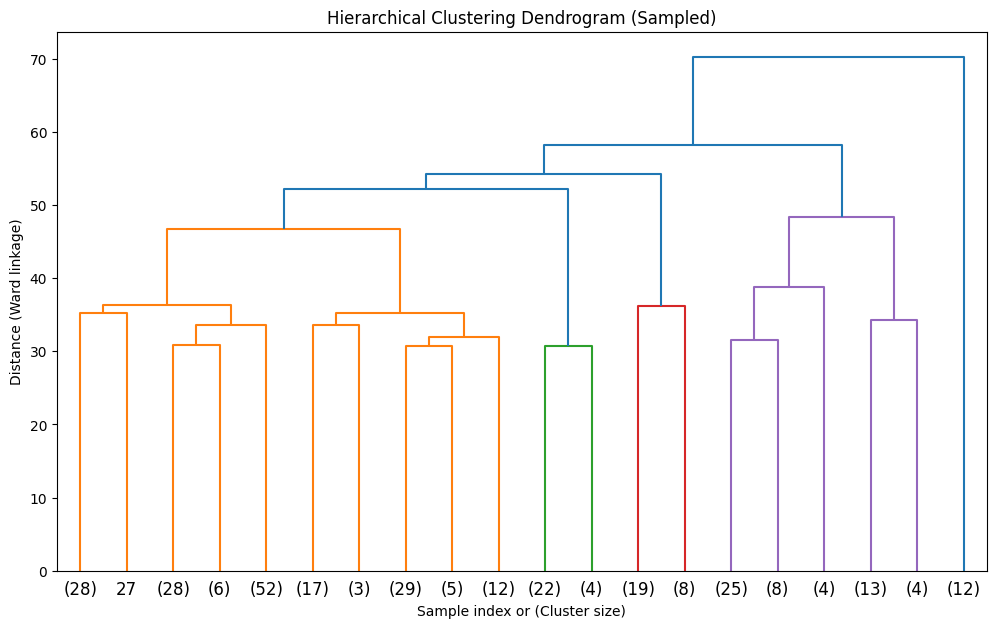


Inspect the dendrogram to decide on the number of clusters for Hierarchical Clustering.
Assuming you choose k=5 for Hierarchical Clustering based on the dendrogram or other criteria.

Hierarchical Clustering: Segments for Manual Labeling (segment_id by cluster):
  Cluster 0: ['20210616-SP03M_clip_1956_1961', '20211119-SP07F_clip_1230_1235', '20211119-SP03M_clip_801_806']
  Cluster 1: ['20230310-SP05F_clip_820_825', '20230310-SP06M_clip_690_695', '20230310-SP06M_clip_1165_1170']
  Cluster 2: ['20230310-SP01F_clip_885_890', '20230310-SP01F_clip_940_945', '20230310-SP04F_clip_1425_1430']
  Cluster 3: ['20220722-SP02F_clip_237_242', '20220722-SP02F_clip_669_674', '20220722-SP02F_clip_126_131']
  Cluster 4: ['20210323-SP03M_clip_3_8', '20221209-SP07F_clip_1160_1165', '20220204-SP07F_clip_1578_1583']


In [ ]:

# --- 7. Hierarchical Clustering (Agglomerative) ---
print("\n--- Hierarchical Clustering ---")
# Plotting the dendrogram (can be computationally intensive for large datasets)
# Consider using a subset if X_train_scaled is too large for dendrogram visualization
sample_size_for_dendrogram = min(len(X_train_scaled), 300) # e.g. 150 samples for dendrogram
if len(X_train_scaled) > sample_size_for_dendrogram:
    print(f"Note: Dendrogram will be plotted for a sample of {sample_size_for_dendrogram} segments due to size.")
    sample_indices = np.random.choice(X_train_scaled.shape[0], sample_size_for_dendrogram, replace=False)
    X_train_sample_for_dendrogram = X_train_scaled[sample_indices]
else:
    X_train_sample_for_dendrogram = X_train_scaled

linked = linkage(X_train_sample_for_dendrogram, method='ward') # 'ward', 'complete', 'average'

plt.figure(figsize=(12, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            truncate_mode='lastp', # Show only the last p merged clusters
            p=20 # Show the last 20 merges (adjust for clarity)
          )
plt.title('Hierarchical Clustering Dendrogram (Sampled)')
plt.xlabel("Sample index or (Cluster size)")
plt.ylabel("Distance (Ward linkage)")
plt.show(block=False) # Use block=False if running in a script to continue execution

print("\nInspect the dendrogram to decide on the number of clusters for Hierarchical Clustering.")
# For this example, let's assume you decide on 3 clusters based on the dendrogram or other criteria.
# Or use the number of unique labels from your labeled data.
final_k_hierarchical = 5 #len(label_df_3['majority_label_3'].unique()) # Or your chosen k
print(f"Assuming you choose k={final_k_hierarchical} for Hierarchical Clustering based on the dendrogram or other criteria.")

agg_clustering = AgglomerativeClustering(n_clusters=final_k_hierarchical, linkage='ward')
train_df['hierarchical_cluster'] = agg_clustering.fit_predict(X_train_scaled)

hierarchical_segments_to_label = get_segments_for_manual_labeling(train_df[['segment_id', 'hierarchical_cluster']].copy(), train_df['hierarchical_cluster'])
print("\nHierarchical Clustering: Segments for Manual Labeling (segment_id by cluster):")

os.mkdir("HIE")
for cluster_id, seg_ids in hierarchical_segments_to_label.items():
    print(f"  Cluster {cluster_id}: {seg_ids}")
    os.mkdir(f"HIE/{cluster_id}")
    for seg_id in seg_ids:
        filepath = segment_id_to_filepath(seg_id)
        os.system(f"cp {filepath} HIE/{cluster_id}")
# To make the plot visible if script finishes too fast
plt.show()

In [ ]:
!cp -r kmean /content/drive/MyDrive/data
!cp -r GMM /content/drive/MyDrive/data
!cp -r HIE /content/drive/MyDrive/data

## Manually assign label for cluster

In [ ]:
# K-Means: Segments for Manual Labeling (segment_id by cluster):
  # Cluster 0: ['20211007-SP07F_clip_2652_2657', '20211007-SP07F_clip_3057_3062', '20211007-SP07F_clip_2442_2447']
  # Cluster 1: ['20221209-SP07F_clip_0_5', '20220916-SP07F_clip_0_5', '20220916-SP03M_clip_450_455']
  # Cluster 2: ['20211007-SP05F_clip_2964_2969', '20211119-SP05F_clip_675_680', '20210616-SP04F_clip_2160_2165']
  # Cluster 3: ['20221209-SP02F_clip_215_220', '20210504-SP01F_clip_411_416', '20221209-SP02F_clip_205_210']
  # Cluster 4: ['20211119-SP01F_clip_345_350', '20211119-SP04F_clip_186_191', '20211119-SP04F_clip_1428_1433']
  # Cluster 5: ['20220722-SP01F_clip_3060_3065', '20220722-SP07F_clip_132_137', '20220722-SP07F_clip_1254_1259']
  # Cluster 6: ['20221209-SP07F_clip_550_555', '20220610-SP07F_clip_1095_1100', '20220610-SP02F_clip_609_614']
  # Cluster 7: ['20230310-SP01F_clip_885_890', '20230310-SP01F_clip_940_945', '20230310-SP04F_clip_1425_1430']
  # Cluster 8: ['20220204-SP01F_clip_180_185', '20210504-SP01F_clip_483_488', '20220204-SP01F_clip_177_182']
  # Cluster 9: ['20220610-SP04F_clip_615_620', '20220610-SP04F_clip_576_581', '20220204-SP02F_clip_2550_2555']
kmeans_cluster_engagement_map = {
    0: "Active engagement",
    1: "Disengagement",
    2: "Intermittent engagement",
    3: "Active engagement",
    4: "Active engagement",
    5: "Active engagement",
    6: "Disengagement",
    7: "Active engagement",
    8: "Intermittent engagement",
    9: "Active engagement",
}
# GMM: Segments for Manual Labeling (segment_id by cluster):
#   Cluster 0: ['20211007-SP07F_clip_2652_2657', '20211007-SP07F_clip_3057_3062', '20211007-SP07F_clip_2442_2447']
#   Cluster 1: ['20220916-SP01F_clip_380_385', '20220722-SP04F_clip_207_212', '20221209-SP03M_clip_2705_2710']
#   Cluster 2: ['20211007-SP04F_clip_1620_1625', '20210616-SP04F_clip_1386_1391', '20220204-SP03M_clip_2751_2756']
#   Cluster 3: ['20221209-SP02F_clip_210_215', '20221209-SP07F_clip_2805_2810', '20221209-SP07F_clip_550_555']
#   Cluster 4: ['20211119-SP03M_clip_1281_1286', '20210323-SP03M_clip_72_77', '20230310-SP05F_clip_280_285']
#   Cluster 5: ['20220204-SP05F_clip_2634_2639', '20230310-SP07F_clip_785_790', '20211007-SP03M_clip_3085_3090']
#   Cluster 6: ['20220722-SP05F_clip_1851_1856', '20220610-SP07F_clip_237_242', '20220610-SP01F_clip_2043_2048']
gmm_cluster_engagement_map = {
    0: "Intermittent engagement",
    1: "Active engagement",
    2: "Intermittent engagement",
    3: "Disengagement",
    4: "Active engagement",
    5: "Intermittent engagement",
    6: "Active engagement",
}

# Hierarchical Clustering: Segments for Manual Labeling (segment_id by cluster):
#   Cluster 0: ['20211007-SP05F_clip_36_41', '20210616-SP03M_clip_414_419', '20210616-SP01F_clip_762_767']
#   Cluster 1: ['20230310-SP03M_clip_190_195', '20230310-SP06M_clip_505_510', '20230310-SP07F_clip_810_815']
#   Cluster 2: ['20221209-SP07F_clip_745_750', '20211007-SP05F_clip_3069_3074', '20210323-SP03M_clip_3_8']
#   Cluster 3: ['20230310-SP01F_clip_885_890', '20230310-SP01F_clip_940_945', '20230310-SP04F_clip_1425_1430']
#   Cluster 4: ['20220722-SP02F_clip_237_242', '20220722-SP02F_clip_669_674', '20220722-SP02F_clip_126_131']
hierarchical_cluster_engagement_map = {
    0: "Intermittent engagement",
    1: "Active engagement",
    2: "Disengagement",
    3: "Active engagement",
    4: "Active engagement",
}


 EVALUATION METHOD 1: DIRECT CLUSTER ASSIGNMENT FOR TEST DATA

--- Evaluation: K-Means (Direct Assignment) ---
Accuracy: 0.3034
Classification Report:
                         precision    recall  f1-score   support

      Active engagement       0.40      0.27      0.32        44
          Disengagement       0.12      0.18      0.15        17
Intermittent engagement       0.34      0.43      0.38        28

               accuracy                           0.30        89
              macro avg       0.29      0.29      0.28        89
           weighted avg       0.33      0.30      0.31        89

Confusion Matrix:
[[12 13 19]
 [10  3  4]
 [ 8  8 12]]


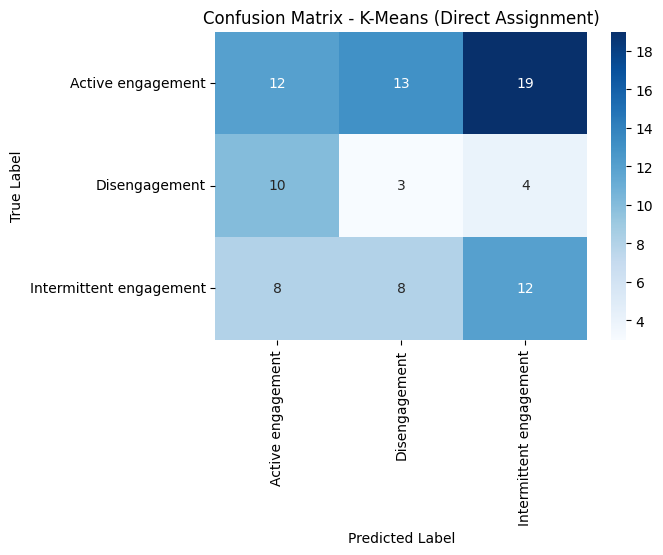


--- Evaluation: GMM (Direct Assignment) ---
Accuracy: 0.1910
Classification Report:
                         precision    recall  f1-score   support

      Active engagement       0.00      0.00      0.00        44
          Disengagement       0.19      1.00      0.32        17
Intermittent engagement       0.00      0.00      0.00        28

               accuracy                           0.19        89
              macro avg       0.06      0.33      0.11        89
           weighted avg       0.04      0.19      0.06        89

Confusion Matrix:
[[ 0 44  0]
 [ 0 17  0]
 [ 0 28  0]]


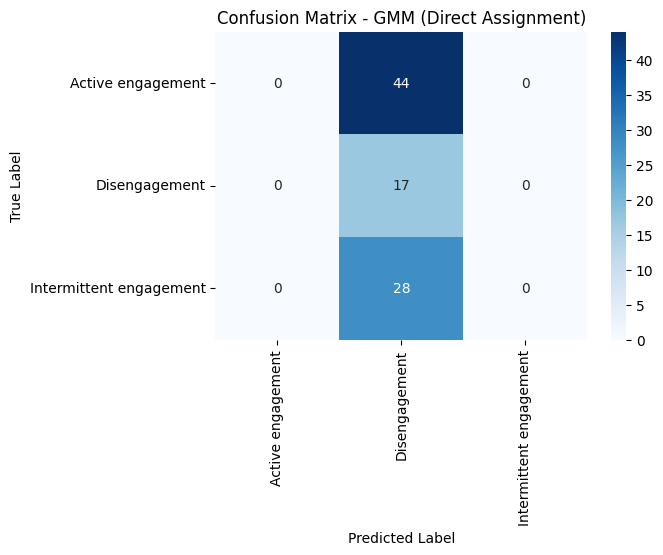


--- Evaluation: Hierarchical (Direct via k-NN) ---
Accuracy: 0.3146
Classification Report:
                         precision    recall  f1-score   support

      Active engagement       0.00      0.00      0.00        44
          Disengagement       0.00      0.00      0.00        17
Intermittent engagement       0.32      1.00      0.49        28

               accuracy                           0.31        89
              macro avg       0.11      0.33      0.16        89
           weighted avg       0.10      0.31      0.15        89

Confusion Matrix:
[[ 0  0 44]
 [ 2  0 15]
 [ 0  0 28]]


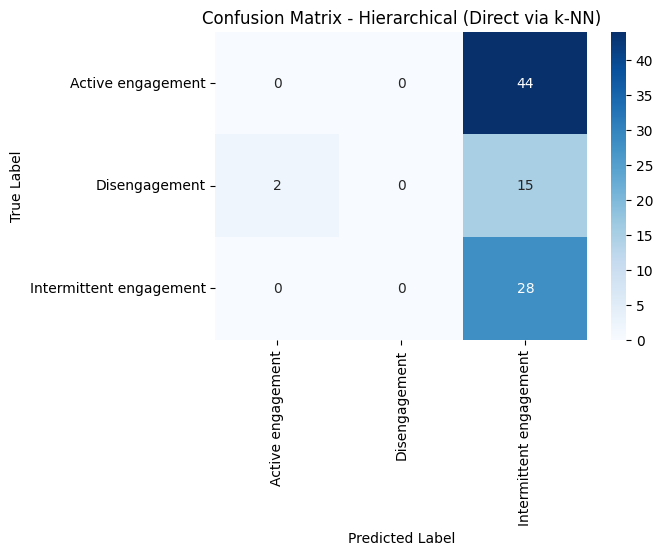

In [ ]:

actual_engagement_labels = sorted(label_df_3['majority_label_3'].unique())

def extract_and_combine_features_eval(df, feature_cols): # Renamed to avoid clash if re-running cells
        feature_dfs = []
        for col in feature_cols:
            expanded_features = pd.DataFrame(df[col].tolist(), index=df.index).add_prefix(f'{col}_')
            feature_dfs.append(expanded_features)
        return pd.concat(feature_dfs, axis=1).apply(pd.to_numeric, errors='coerce').fillna(0)

# --- 2. Apply Mappings to Training Data (Create Pseudo-Labels) ---
train_df['kmeans_pseudo_label'] = train_df['kmeans_cluster'].map(kmeans_cluster_engagement_map)
train_df['gmm_pseudo_label'] = train_df['gmm_cluster'].map(gmm_cluster_engagement_map)
train_df['hierarchical_pseudo_label'] = train_df['hierarchical_cluster'].map(hierarchical_cluster_engagement_map)

# --- 3. Prepare Test Data Features ---
X_test_features = extract_and_combine_features_eval(test_df, target_feature_columns) # Use the same helper
X_test_scaled = scaler.transform(X_test_features) # Use the scaler fitted on training data

# Merge true labels into test_df for easy comparison
test_df_eval = test_df.merge(label_df_3[['segment_id', 'majority_label_3']], on='segment_id', how='left')
y_true_test = test_df_eval['majority_label_3']


# --- Helper function for printing evaluation results ---
def print_evaluation(y_true, y_pred, title, labels_order):
    print(f"\n--- Evaluation: {title} ---")
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, labels=labels_order, zero_division=0))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred, labels=labels_order)
    print(cm)

    # Plotting confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_order, yticklabels=labels_order)
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show(block=False)

# --- 4. Evaluation Method 1: Direct Cluster Assignment for Test Data ---
print("\n===================================================================")
print(" EVALUATION METHOD 1: DIRECT CLUSTER ASSIGNMENT FOR TEST DATA")
print("===================================================================")

# K-Means (Method 1)
test_kmeans_cluster_ids = kmeans_final.predict(X_test_scaled)
y_pred_kmeans_m1 = pd.Series(test_kmeans_cluster_ids).map(kmeans_cluster_engagement_map)
print_evaluation(y_true_test, y_pred_kmeans_m1, "K-Means (Direct Assignment)", actual_engagement_labels)

# GMM (Method 1)
test_gmm_cluster_ids = gmm_final.predict(X_test_scaled)
y_pred_gmm_m1 = pd.Series(test_gmm_cluster_ids).map(gmm_cluster_engagement_map)
print_evaluation(y_true_test, y_pred_gmm_m1, "GMM (Direct Assignment)", actual_engagement_labels)

# Hierarchical (Method 1 - using k-NN to assign test data to training clusters)
# Train a k-NN classifier on the training data's cluster assignments
knn_hierarchical = KNeighborsClassifier(n_neighbors=5) # You can tune n_neighbors
knn_hierarchical.fit(X_train_scaled, train_df['hierarchical_cluster'])
test_hierarchical_cluster_ids = knn_hierarchical.predict(X_test_scaled)
y_pred_hierarchical_m1 = pd.Series(test_hierarchical_cluster_ids).map(hierarchical_cluster_engagement_map)
print_evaluation(y_true_test, y_pred_hierarchical_m1, "Hierarchical (Direct via k-NN)", actual_engagement_labels)

# Keep plots visible
plt.show()


--- Method 1: Classifier-Based Feature Importance (Random Forest) ---

Calculating Random Forest feature importance for K-Means clusters...


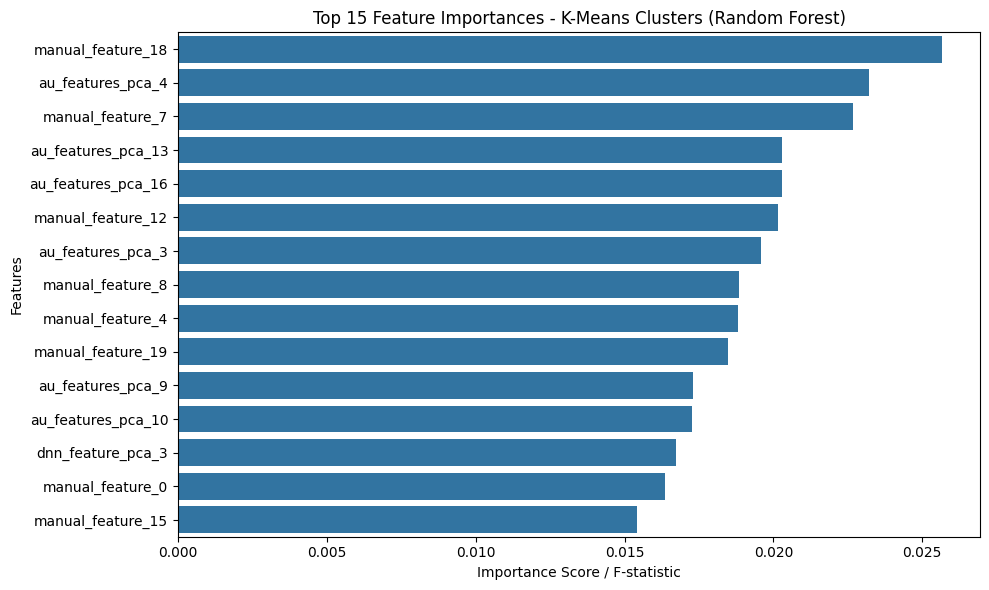

Top features for K-Means (Random Forest):
manual_feature_18     0.025656
au_features_pca_4     0.023196
manual_feature_7      0.022671
au_features_pca_13    0.020287
au_features_pca_16    0.020275
manual_feature_12     0.020145
au_features_pca_3     0.019597
manual_feature_8      0.018859
manual_feature_4      0.018806
manual_feature_19     0.018479
au_features_pca_9     0.017305
au_features_pca_10    0.017265
dnn_feature_pca_3     0.016712
manual_feature_0      0.016362
manual_feature_15     0.015430
dtype: float64


Calculating Random Forest feature importance for GMM clusters...


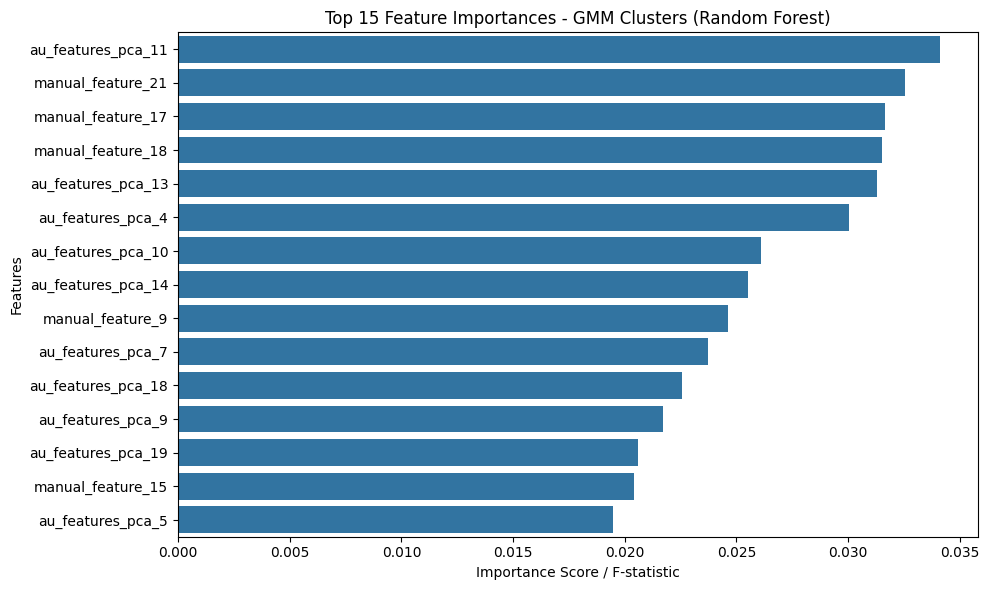

Top features for GMM (Random Forest):
au_features_pca_11    0.034101
manual_feature_21     0.032532
manual_feature_17     0.031654
manual_feature_18     0.031502
au_features_pca_13    0.031317
au_features_pca_4     0.030040
au_features_pca_10    0.026093
au_features_pca_14    0.025504
manual_feature_9      0.024619
au_features_pca_7     0.023711
au_features_pca_18    0.022581
au_features_pca_9     0.021728
au_features_pca_19    0.020582
manual_feature_15     0.020434
au_features_pca_5     0.019475
dtype: float64


Calculating Random Forest feature importance for Hierarchical clusters...


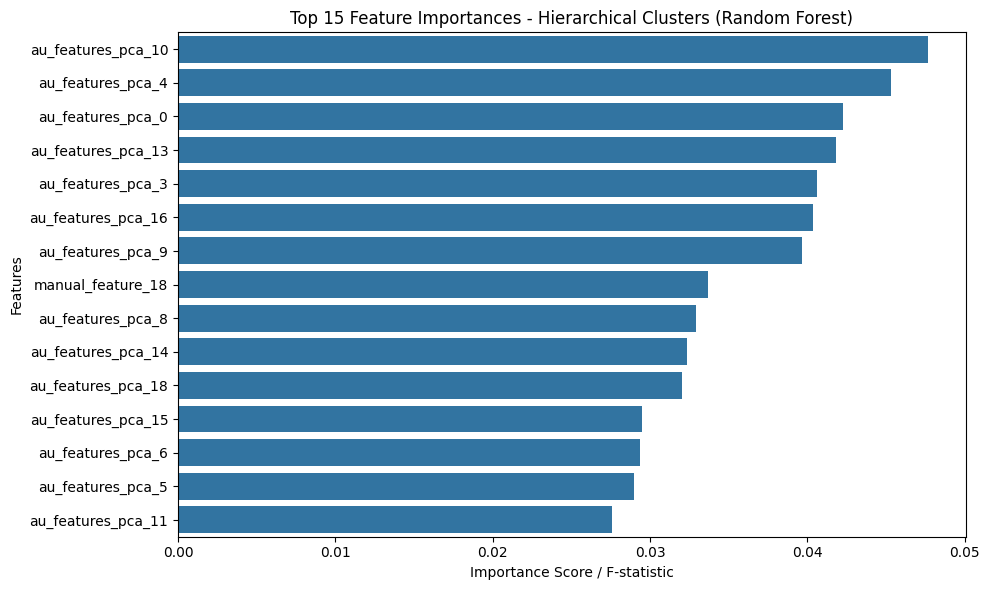

Top features for Hierarchical (Random Forest):
au_features_pca_10    0.047685
au_features_pca_4     0.045335
au_features_pca_0     0.042292
au_features_pca_13    0.041836
au_features_pca_3     0.040616
au_features_pca_16    0.040375
au_features_pca_9     0.039664
manual_feature_18     0.033678
au_features_pca_8     0.032909
au_features_pca_14    0.032334
au_features_pca_18    0.032032
au_features_pca_15    0.029511
au_features_pca_6     0.029338
au_features_pca_5     0.028960
au_features_pca_11    0.027589
dtype: float64



--- Method 2: ANOVA F-statistic based Feature Importance ---

Calculating ANOVA F-statistic for K-Means clusters...


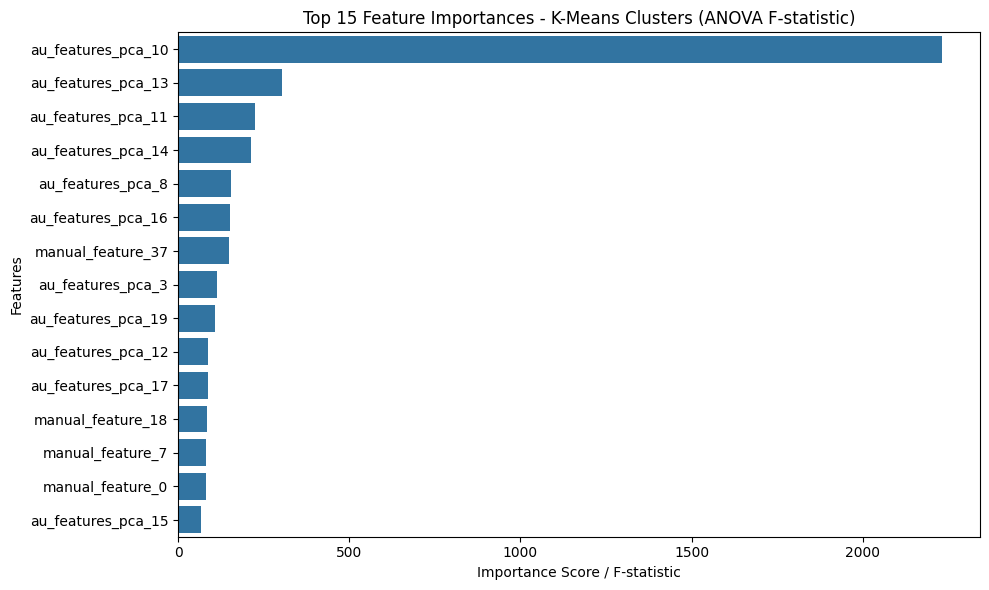

Top features for K-Means (ANOVA F-statistic):
au_features_pca_10    2230.812277
au_features_pca_13     304.334708
au_features_pca_11     223.565843
au_features_pca_14     212.499920
au_features_pca_8      155.152072
au_features_pca_16     153.111244
manual_feature_37      148.538043
au_features_pca_3      115.093832
au_features_pca_19     107.262708
au_features_pca_12      88.024750
au_features_pca_17      87.454707
manual_feature_18       83.778389
manual_feature_7        81.195193
manual_feature_0        81.195193
au_features_pca_15      68.232897
dtype: float64


Calculating ANOVA F-statistic for GMM clusters...


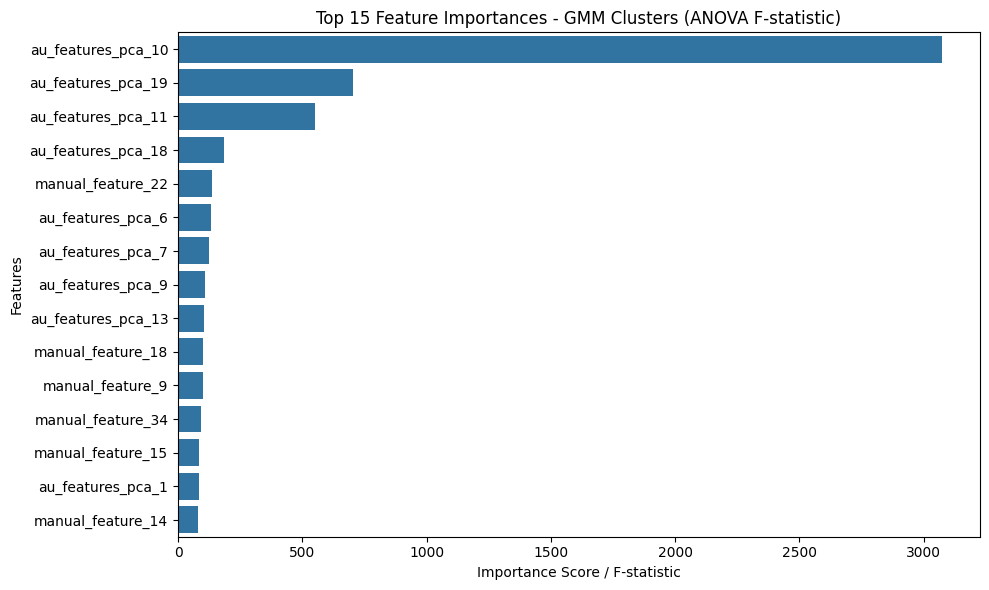

Top features for GMM (ANOVA F-statistic):
au_features_pca_10    3072.624014
au_features_pca_19     705.651870
au_features_pca_11     550.709193
au_features_pca_18     183.027479
manual_feature_22      137.383269
au_features_pca_6      134.311646
au_features_pca_7      126.525258
au_features_pca_9      109.577610
au_features_pca_13     103.490786
manual_feature_18      101.539854
manual_feature_9        98.459148
manual_feature_34       90.539987
manual_feature_15       84.874659
au_features_pca_1       84.299664
manual_feature_14       78.344097
dtype: float64


Calculating ANOVA F-statistic for Hierarchical clusters...


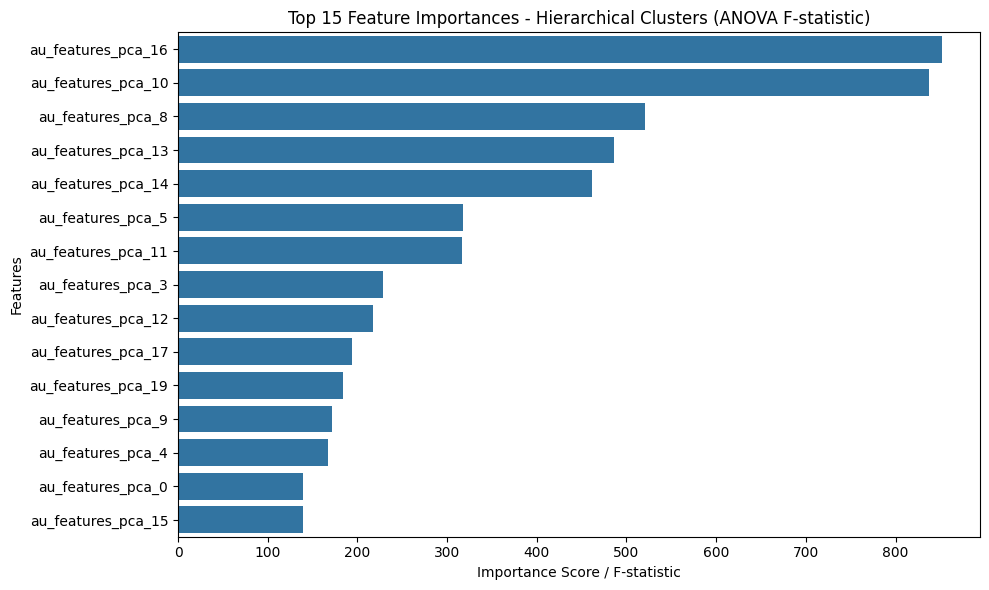

Top features for Hierarchical (ANOVA F-statistic):
au_features_pca_16    851.595238
au_features_pca_10    837.300765
au_features_pca_8     521.005458
au_features_pca_13    485.888983
au_features_pca_14    461.350155
au_features_pca_5     318.063710
au_features_pca_11    317.087506
au_features_pca_3     228.095780
au_features_pca_12    217.246975
au_features_pca_17    194.002636
au_features_pca_19    183.631862
au_features_pca_9     171.494885
au_features_pca_4     166.857165
au_features_pca_0     139.365692
au_features_pca_15    138.942324
dtype: float64



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif # For ANOVA F-values

# --- Helper function to plot feature importances ---
def plot_feature_importances(importances, names, title, top_n=15):
    feature_importances = pd.Series(importances, index=names)
    sorted_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(10, max(6, top_n * 0.3))) # Adjust height based on top_n
    sns.barplot(x=sorted_importances.head(top_n).values, y=sorted_importances.head(top_n).index)
    plt.title(f'Top {top_n} Feature Importances - {title}')
    plt.xlabel('Importance Score / F-statistic')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show(block=False)
    return sorted_importances.head(top_n)

# --- 1. Classifier-Based Feature Importance (Random Forest) ---
print("\n--- Method 1: Classifier-Based Feature Importance (Random Forest) ---")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
feature_names = X_test_features.columns.tolist()
cluster_methods_for_importance = {
    "K-Means": "kmeans_cluster",
    "GMM": "gmm_cluster",
    "Hierarchical": "hierarchical_cluster"
}

for method_name, cluster_col in cluster_methods_for_importance.items():
    print(f"\nCalculating Random Forest feature importance for {method_name} clusters...")
    if cluster_col not in train_df.columns:
        print(f"Cluster column '{cluster_col}' not found in train_df. Skipping {method_name}.")
        continue

    y_clusters = train_df[cluster_col]

    # Ensure there's more than one class for the classifier
    if len(y_clusters.unique()) < 2:
        print(f"Skipping {method_name} as it has only one cluster label.")
        continue

    rf_classifier.fit(X_train_scaled, y_clusters)
    importances = rf_classifier.feature_importances_
    top_rf_features = plot_feature_importances(importances, feature_names, f"{method_name} Clusters (Random Forest)")
    print(f"Top features for {method_name} (Random Forest):\n{top_rf_features}\n")


# --- 2. ANOVA F-statistic based Feature Importance ---
print("\n\n--- Method 2: ANOVA F-statistic based Feature Importance ---")
# ANOVA F-value expects non-negative values for scores if using SelectKBest, but f_classif returns F-stats directly.
# The F-statistic itself is the measure of importance.

for method_name, cluster_col in cluster_methods_for_importance.items():
    print(f"\nCalculating ANOVA F-statistic for {method_name} clusters...")
    if cluster_col not in train_df.columns:
        print(f"Cluster column '{cluster_col}' not found in train_df. Skipping {method_name}.")
        continue

    y_clusters = train_df[cluster_col]

    if len(y_clusters.unique()) < 2:
        print(f"Skipping {method_name} as it has only one cluster label for ANOVA.")
        continue

    # f_classif returns F-statistics and p-values
    # We are interested in F-statistics; higher is better.
    f_values, p_values = f_classif(X_train_scaled, y_clusters)

    # Handle potential NaN F-values (e.g., if a feature has zero variance within groups)
    f_values = np.nan_to_num(f_values, nan=0.0)

    top_anova_features = plot_feature_importances(f_values, feature_names, f"{method_name} Clusters (ANOVA F-statistic)")
    print(f"Top features for {method_name} (ANOVA F-statistic):\n{top_anova_features}\n")


# Keep plots visible if script finishes execution
plt.show()